In [1]:
import numpy as np
import scipy.misc, math
from PIL import Image
from pylab import *

## Histogram

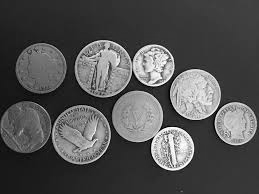

In [2]:
# Open coins jpeg image
coin_img_path = 'images/images/coins.jpg'
coin_img = Image.open(coin_img_path).convert('L')
coin_img

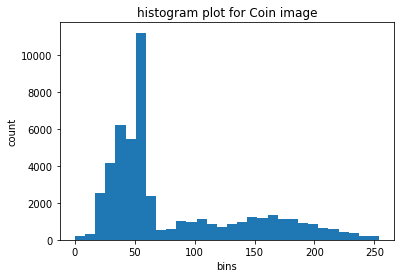

In [31]:
coin_img_array = np.asarray(coin_img)
hist(coin_img_array.flatten(), 30)
xlabel("bins")
ylabel("count")
title("histogram plot for Coin image")
show()

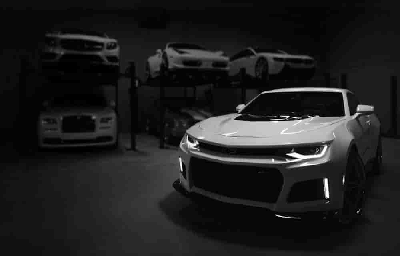

In [4]:
# Open Car jpeg image
car_img_path = 'images/images/car-min.jpg'
car_img = Image.open(car_img_path).convert('L')
car_img.resize((400, 256))

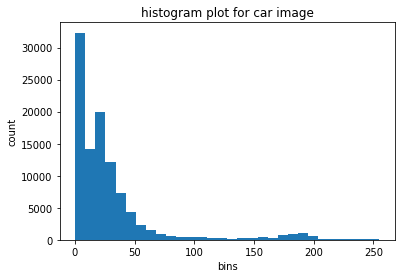

In [28]:
car_img_array = np.asarray(car_img)
hist(car_img_array.flatten(), 30)
xlabel("bins")
ylabel("count")
title("histogram plot for car image")
show()

## Histogram Equalizing

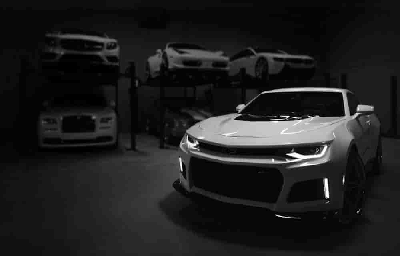

In [6]:
car_img_path = 'images/images/car-min.jpg'
car_img = Image.open(car_img_path)
car_img = car_img.resize((400, 256))
car_img_array = np.asarray(car_img)
car_img

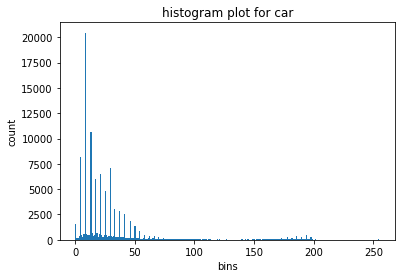

In [7]:
hist(car_img_array.flatten(), 256)
xlabel("bins")
ylabel("count")
title("histogram plot for car")
show()

In [8]:
# Flatten the image
f1 = car_img_array.flatten()

In [9]:
# Calculate the histogram of the image
histo, bins = (np.histogram(car_img_array, 256, [0,255]))

In [10]:
# Do the cummulative sum of histo
cdf = histo.cumsum()
# Print the cdf
# cdf

In [11]:
# Add mask for 0 value
cdf_m = np.ma.masked_equal(cdf, 0)
# print the masked cdf value
# cdf_m

In [12]:
# Subtract each value of in cdf_m with its minimum value and multiply by 255
num_cdf_m = (cdf_m - cdf_m.min()) * 255
# num_cdf_m

In [13]:
# Calculate differecen of max and min value of cdf
den_cdf_m = (cdf_m.max() - cdf_m.min())
den_cdf_m

100819

In [14]:
# Divide 
cdf_m = num_cdf_m / den_cdf_m
# cdf_m

In [15]:
# Fill the masked value with 0
# Convert float into 8 bit integer
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
# cdf

In [16]:
# Read the calculated cdf value for each pixel for f1
car_image_array_equ = cdf[f1]

In [17]:
len(f1), len(cdf)

(102400, 256)

In [18]:
# Convert new array with the shape of original image
car_image_array_equ = np.reshape(car_image_array_equ, car_img_array.shape)

In [19]:
# Convert array as image
car_image_equ = Image.fromarray(car_image_array_equ)

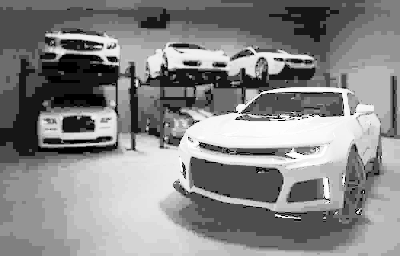

In [20]:
# Plot the equalized image
car_image_equ

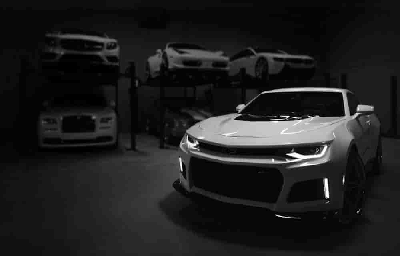

In [21]:
# Plot the original image
car_img

### Plot the histogram

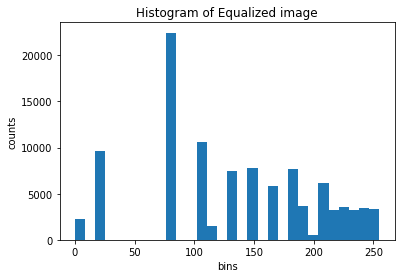

In [29]:
figure()
hist(car_image_array_equ.flatten(), 30)
xlabel("bins")
ylabel("counts")
title("Histogram of Equalized image")
show()

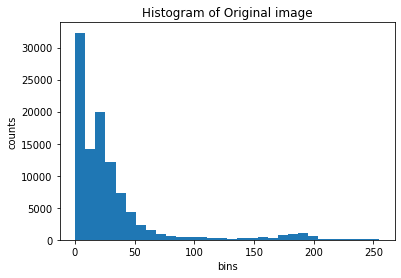

In [30]:
figure()
hist(car_img_array.flatten(), 30)
xlabel("bins")
ylabel("counts")
title("Histogram of Original image")
show()